In [1]:
import praw
from textblob import TextBlob
from tabulate import tabulate  # Import tabulate

def analyze_sentiment_for_reddit_url(client_id, client_secret, user_agent, reddit_url):
    """
    Perform sentiment analysis on the comments of a Reddit page.

    Parameters:
    - client_id: str, Reddit API client ID
    - client_secret: str, Reddit API client secret
    - user_agent: str, Reddit API user agent
    - reddit_url: str, URL of the Reddit page to analyze

    Returns:
    - sentiment_results: list of dictionaries, each containing sentiment analysis results for a comment
    """
    # Authenticate with the Reddit API
    reddit = praw.Reddit(
        client_id=client_id,
        client_secret=client_secret,
        user_agent=user_agent
    )

    # Extract the submission ID from the Reddit URL
    submission_id = reddit_url.split('/')[-3]

    # Get the submission (post) using the submission ID
    submission = reddit.submission(id=submission_id)

    # Collect comments from the submission
    comments = submission.comments.list()

    # Perform sentiment analysis on each comment using TextBlob
    sentiment_results = []
    for i, comment in enumerate(comments, start=1):  # Add enumerate to get comment order
        # Perform sentiment analysis using TextBlob
        analysis = TextBlob(comment.body)

        # Classify sentiment label
        sentiment_label = "Positive" if analysis.sentiment.polarity > 0 else "Negative" if analysis.sentiment.polarity < 0 else "Neutral"

        # Create a dictionary with sentiment analysis results for the comment
        sentiment_result = {
            "Comment Order": i,  # Numeric order of the comment
            "Comment": comment.body,
            "Sentiment Score": analysis.sentiment.polarity,
            "Sentiment Label": sentiment_label,
        }

        sentiment_results.append(sentiment_result)

    return sentiment_results

# Example usage
client_id = "Q0sGHW7QlLiArtfsD3Hesw"
client_secret = "8S_6DzIdMfDdIXTFb6rgvFYczdYoHQ"
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"  # Replace with your actual user agent
reddit_url = "https://www.reddit.com/r/Dublin/comments/17s5bj9/luas/"

# Perform sentiment analysis on the comments of the Reddit page
sentiment_results = analyze_sentiment_for_reddit_url(client_id, client_secret, user_agent, reddit_url)

# Display sentiment analysis results in a table format
table_headers = ["Comment Order", "Comment", "Sentiment Score", "Sentiment Label"]
table_data = [(result["Comment Order"], result["Comment"], result["Sentiment Score"], result["Sentiment Label"]) for result in sentiment_results]

print(tabulate(table_data, headers=table_headers, tablefmt="grid"))


+-----------------+---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------

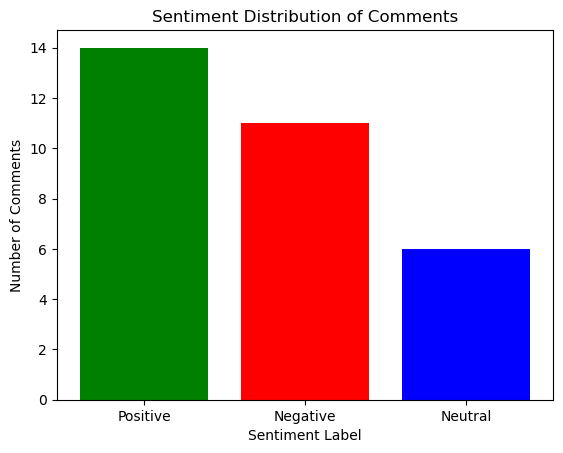

In [2]:
import praw
from textblob import TextBlob
import matplotlib.pyplot as plt

def analyze_and_visualize_sentiment(client_id, client_secret, user_agent, reddit_url):
    """
    Perform sentiment analysis on the comments of a Reddit page and visualize the results.

    Parameters:
    - client_id: str, Reddit API client ID
    - client_secret: str, Reddit API client secret
    - user_agent: str, Reddit API user agent
    - reddit_url: str, URL of the Reddit page to analyze
    """
    # Authenticate with the Reddit API
    reddit = praw.Reddit(
        client_id=client_id,
        client_secret=client_secret,
        user_agent=user_agent
    )

    # Extract the submission ID from the Reddit URL
    submission_id = reddit_url.split('/')[-3]

    # Get the submission (post) using the submission ID
    submission = reddit.submission(id=submission_id)

    # Collect comments from the submission
    comments = submission.comments.list()

    # Perform sentiment analysis on each comment using TextBlob
    sentiment_results = []
    for comment in comments:
        # Perform sentiment analysis using TextBlob
        analysis = TextBlob(comment.body)

        # Classify sentiment label
        sentiment_label = "Positive" if analysis.sentiment.polarity > 0 else "Negative" if analysis.sentiment.polarity < 0 else "Neutral"

        # Create a dictionary with sentiment analysis results for the comment
        sentiment_result = {
            "Comment": comment.body,
            "Sentiment Score": analysis.sentiment.polarity,
            "Sentiment Label": sentiment_label,
        }

        sentiment_results.append(sentiment_result)

    # Visualize sentiment distribution
    visualize_sentiment(sentiment_results)

def visualize_sentiment(sentiment_results):
    """
    Visualize the sentiment distribution of comments.

    Parameters:
    - sentiment_results: list of dictionaries, each containing sentiment analysis results for a comment
    """
    # Count the number of comments for each sentiment label
    sentiment_counts = {"Positive": 0, "Negative": 0, "Neutral": 0}
    for result in sentiment_results:
        sentiment_counts[result["Sentiment Label"]] += 1

    # Plot the bar chart
    labels = list(sentiment_counts.keys())
    values = list(sentiment_counts.values())

    plt.bar(labels, values, color=['green', 'red', 'blue'])
    plt.xlabel('Sentiment Label')
    plt.ylabel('Number of Comments')
    plt.title('Sentiment Distribution of Comments')
    plt.show()

# Example usage
client_id = "Q0sGHW7QlLiArtfsD3Hesw"
client_secret = "8S_6DzIdMfDdIXTFb6rgvFYczdYoHQ"
user_agent = "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"  # Replace with your actual user agent
reddit_url = "https://www.reddit.com/r/Dublin/comments/17s5bj9/luas/"

# Perform sentiment analysis and visualize the results
analyze_and_visualize_sentiment(client_id, client_secret, user_agent, reddit_url)
